# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [229]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
organized_df = combined_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites",
                            "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
# Display the data table for preview
organized_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = organized_df[organized_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
identified_dupli = duplicate_mice["Mouse ID"].unique()
identified_dupli

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_extraction = organized_df.loc[(organized_df["Mouse ID"] =="g989"),:]
mice_extraction

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

remove_mice = organized_df["Mouse ID"] =="g989"
clean_df = organized_df.drop(organized_df[remove_mice].index, inplace = False)
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [28]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].unique()
len(num_mice)

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_dataframe = pd.DataFrame({"Mean Tumor Volume" : mean_stats,
                                  "Median Tumor Volume" : median_stats,
                                  "Tumor Volume Variance" : var_stats,
                                  "Tumor Volume Std. Dev." : sd_stats,
                                  "Tumor Volume Std. Err." : sem_stats})
summary_dataframe




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

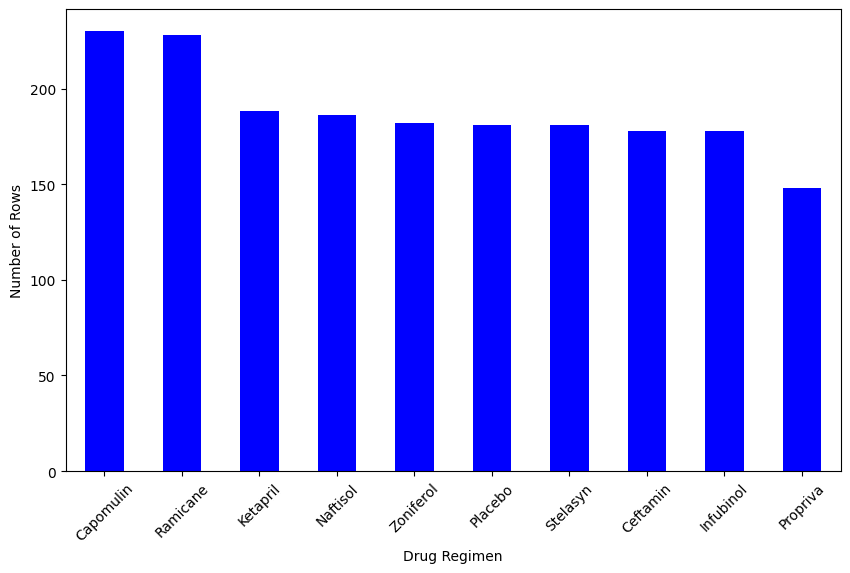

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_size = (clean_df.groupby('Drug Regimen').size()).sort_values(ascending = False)

regimen_size.plot(kind='bar', figsize=(10, 6), rot=0, color='blue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

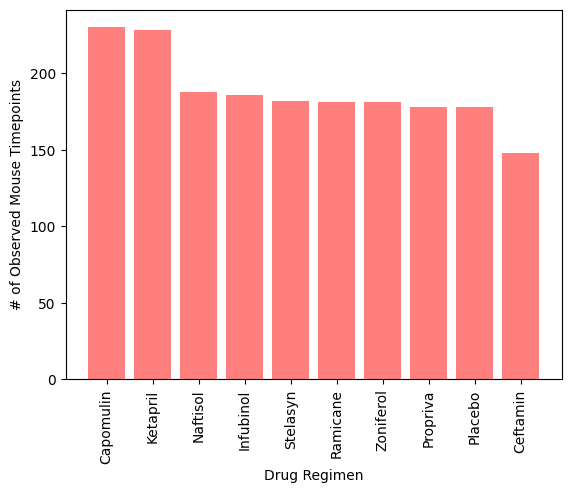

<Figure size 2000x400 with 0 Axes>

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

size_reg = clean_df.groupby("Drug Regimen")["Mouse ID"].size()
size_reg = size_reg.sort_values(ascending = False)
x_axis = size_reg.index
plt.bar(unique_reg, size_reg, color = 'red', alpha = 0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.figure(figsize = (20, 4))
plt.show()

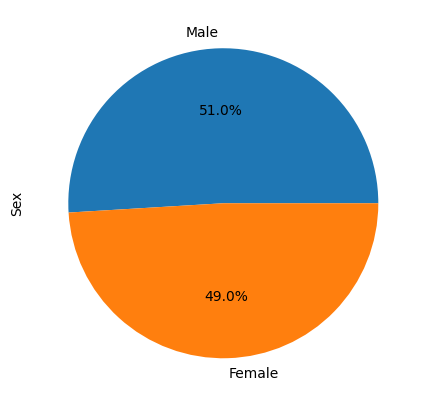

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = clean_df["Sex"].value_counts()
gender_dist.plot(kind="pie",autopct='%1.1f%%', figsize = (5,10), startangle = 0)
plt.ylabel("Sex")
plt.show()


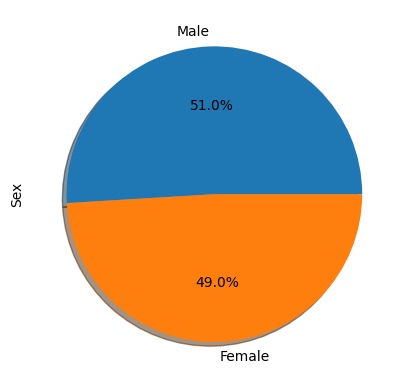

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Male", "Female"]
gender_ratio = gender_dist
explode = (0,0)
plt.pie(gender_ratio, explode=explode, labels=genders, autopct="%1.1f%%",
        shadow = True, startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [177]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_mouse = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# max_mouse
merged_max_df = pd.merge(max_mouse, clean_df,
                         on =["Mouse ID","Timepoint"],how= "left")
merged_max_df
# test_merged = merged_max_df.loc[(merged_max_df["Mouse ID"] =="a203"),:]
# test_merged
# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [178]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    IQR_df = merged_max_df.loc[merged_max_df["Drug Regimen"] ==treatment, "Tumor Volume (mm3)"]
    
    
    # add subset 
    tumor_vol.append(IQR_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = IQR_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    outliers = IQR_df[(IQR_df < lower_bound) | (IQR_df > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


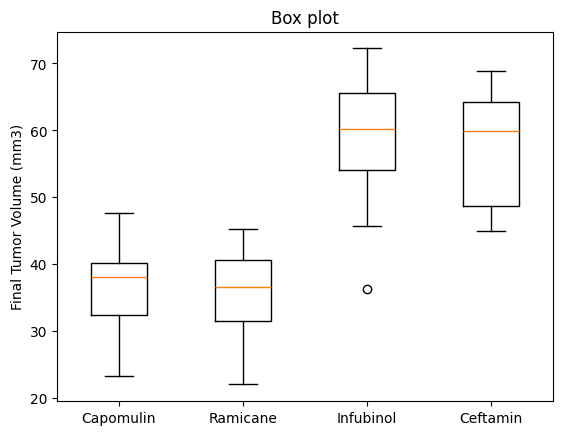

In [180]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, tick_labels = treatments)
plt.show()


## Line and Scatter Plots

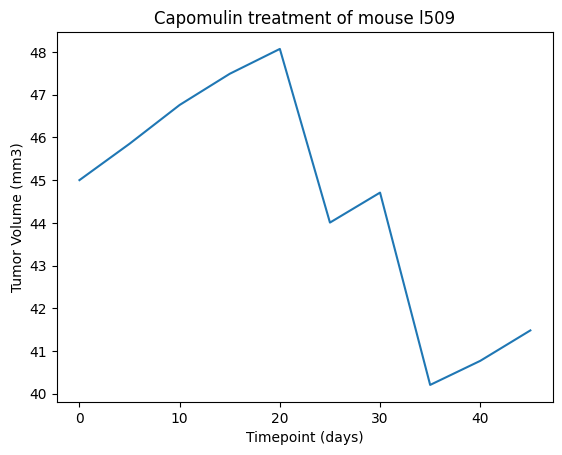

In [188]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

target_df = clean_df.loc[(clean_df["Mouse ID"] == "l509"),:]
l509_tumor_vol = target_df["Tumor Volume (mm3)"]
l509_timepoint = target_df["Timepoint"]
plt.plot(l509_timepoint, l509_tumor_vol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

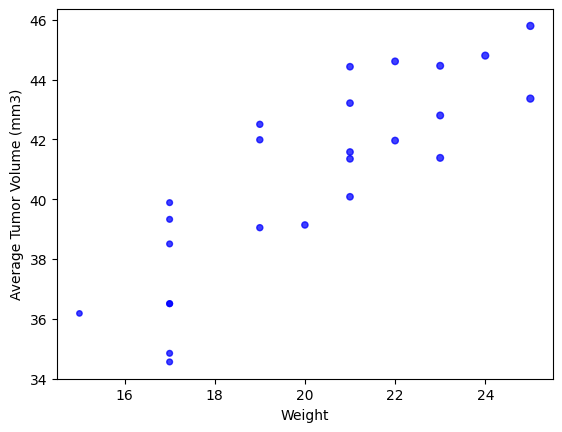

In [224]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"), :]
specify_mouse = cap_df["Mouse ID"].unique()

mouse_weight = cap_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tum = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

x_axis_cap = mouse_weight
y_axis_cap = avg_tum
plt.scatter(x_axis_cap, y_axis_cap, marker= 'o', facecolors = 'blue',
            s= x_axis_cap, alpha=0.75)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


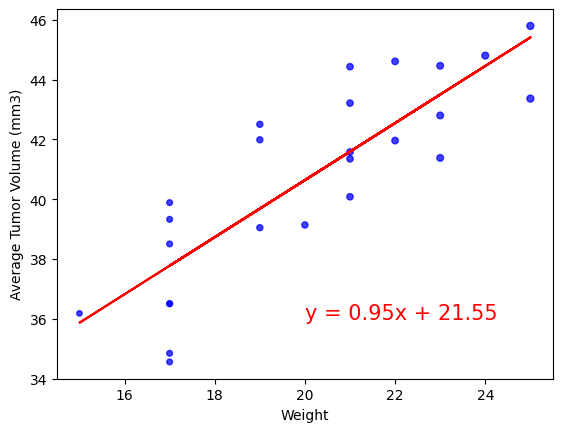

In [234]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis_cap,y_axis_cap)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_cap, y_axis_cap)
regress_values = x_axis_cap * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis_cap, y_axis_cap, marker= 'o', facecolors = 'blue',
            s= x_axis_cap, alpha=0.75)
plt.plot(x_axis_cap,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

plt.show()